In [ ]:
using PyPlot
pygui(true)

# Import necessary packages
using Luna
using LaTeXStrings
using FFTW
using DelimitedFiles
using DSP
using Polynomials

## Parabolic vs. spherical MPC mirror

In [ ]:
dir_path = joinpath("output_sorted", "parabolic_vs_spherical_mirror")

## SPHERICAL MIRROR

#spectrum
file = joinpath(dir_path, "run_2025_03_07__14_04_30", "output_spectrum.txt")
data = readdlm(file, '\t')
λ_spherical = data[:,1]   
I_spherical = data[:,2]

# phase
file = joinpath(dir_path, "run_2025_03_07__14_04_30", "output_phase.txt")
data = readdlm(file, '\t')   
ϕω_spherical = data[:,2]


## PARABOLIC MIRROR

# spectrum
file = joinpath(dir_path, "run_2025_03_06__10_43_45", "output_spectrum.txt")
data = readdlm(file, '\t')
λ_parabolic = data[:,1]   
I_parabolic = data[:,2]

# parabolic
file = joinpath(dir_path, "run_2025_03_06__10_43_45", "output_phase.txt")
data = readdlm(file, '\t')   
ϕω_parabolic = data[:,2]

2048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

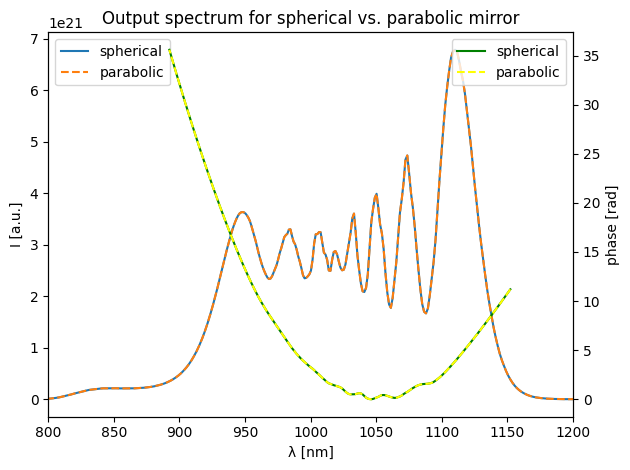

In [17]:
fig, ax1 = plt.subplots()
ax1.set_title("Output spectrum for spherical vs. parabolic mirror")
ax1.plot(λ_spherical, I_spherical, label="spherical")#, marker="o")
ax1.plot(λ_parabolic, I_parabolic, label="parabolic", linestyle="--")#, marker="o")
ax2 = ax1.twinx()
ax2.plot(λ_parabolic, ϕω_spherical, label="spherical", color="green")
ax2.plot(λ_parabolic, ϕω_parabolic, label="parabolic", color="yellow", linestyle="--")
ax1.set_xlim(800, 1200)
ax1.set_xlabel("λ [nm]")
ax1.set_ylabel("I [a.u.]")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
plt.gcf()

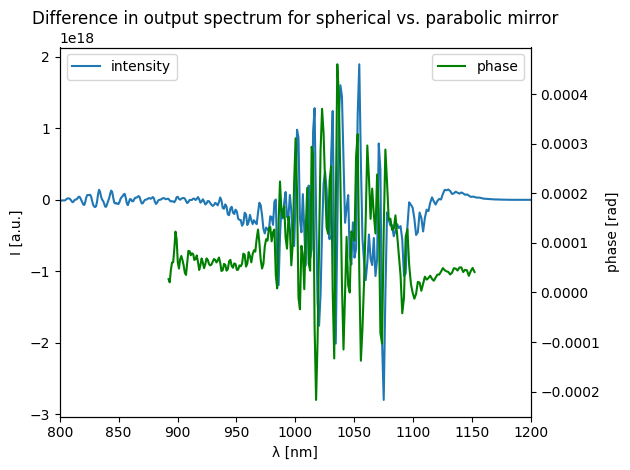

In [ ]:
# differences betweem the two spectra
I_diff = I_spherical.-I_parabolic
ϕω_diff = ϕω_spherical.-ϕω_parabolic

fig, ax1 = plt.subplots()
ax1.set_title("Difference in output spectrum for spherical vs. parabolic mirror")
ax1.plot(λ_spherical, I_diff, label="intensity")#, marker="o")
ax2 = ax1.twinx()
ax2.plot(λ_parabolic, ϕω_diff, label="phase", color="green")
ax1.set_xlim(800, 1200)
ax1.set_xlabel("λ [nm]")
ax1.set_ylabel("I [a.u.]")
ax2.set_ylabel("phase [rad]")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
# plt.show()
plt.gcf()